In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pdO


### Example 1: Noise detection, Scatter plot

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

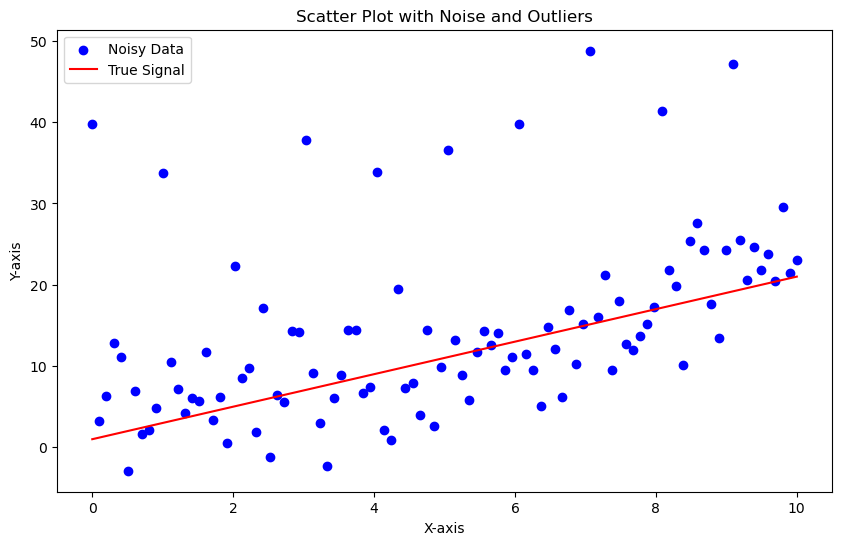

In [4]:

# Generate synthetic data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 * x + 1

# Add random noise
noise = np.random.normal(0, 5, size=y.shape)
y_noisy = y + noise

# Introduce outliers
y_noisy[::10] += 30  # Every 10th point is an outlier
print(x)
print(y_noisy)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, color='blue', label='Noisy Data')
plt.plot(x, y, color='red', label='True Signal')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Noise and Outliers')
plt.legend()
plt.show()


### Example 2: Noise detection, Time series plot

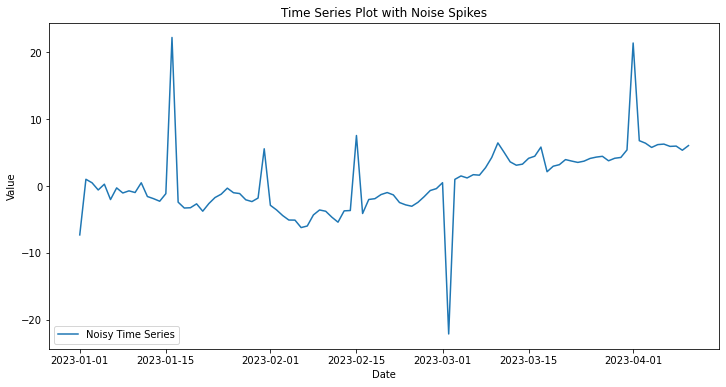

In [5]:
# Generate time series data
np.random.seed(1)
dates = pd.date_range('2023-01-01', periods=100)
values = np.cumsum(np.random.randn(100))  # Random walk

# Add noise spikes
values[::15] += np.random.randn(7) * 20  # Every 15th point is a noise spike

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Value': values})
df.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Noisy Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot with Noise Spikes')
plt.legend()
plt.show()


### Example 3: Noise detection, Descriptive statistics

In [10]:
# Sample data with noise
data = np.random.normal(50, 10, 1000)  # Mean=50, SD=10
data_with_noise = np.copy(data)
data_with_noise[::50] += np.random.normal(0, 50, 20)  # Introduce noise

# Calculate statistics
mean = np.mean(data_with_noise)
std_dev = np.std(data_with_noise)
variance = np.var(data_with_noise)

print(f"Mean (without noise): {np.mean(data):.2f}")
print(f"Standard Deviation (without noise): {np.std(data):.2f}")
print(f"Variance: (without noise) {np.var(data):.2f}")
print('='*40)
print(f"Mean (with noise): {np.mean(data_with_noise):.2f}")
print(f"Standard Deviation (with noise): {np.std(data_with_noise):.2f}")
print(f"Variance: (with noise) {np.var(data_with_noise):.2f}")


Mean (without noise): 50.46
Standard Deviation (without noise): 10.09
Variance: (without noise) 101.76
Mean (with noise): 50.53
Standard Deviation (with noise): 12.51
Variance: (with noise) 156.61


### Example 4: Chi-Square test for noise detection

In [4]:
from scipy.stats import chisquare

# Observed frequencies
observed = np.array([580, 320, 100])

# Expected frequencies
expected_percentages = np.array([0.60, 0.30, 0.10])
expected = expected_percentages * 1000  # Total components = 1000
print(expected)

# Perform Chi-Square Goodness-of-Fit Test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-Square Statistic: {chi_stat:.4f}")
print(f"P-value: {p_value:.4f}")


[600. 300. 100.]
Chi-Square Statistic: 2.0000
P-value: 0.3679


### Example 5: Understanding Fourier Transform

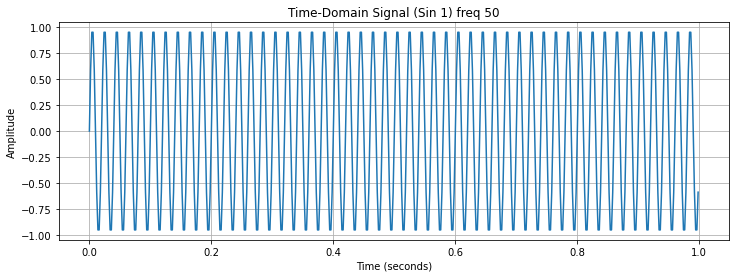

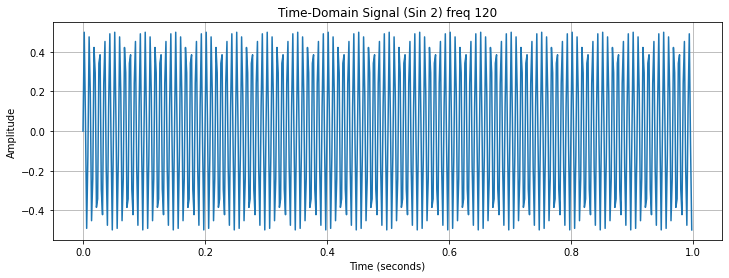

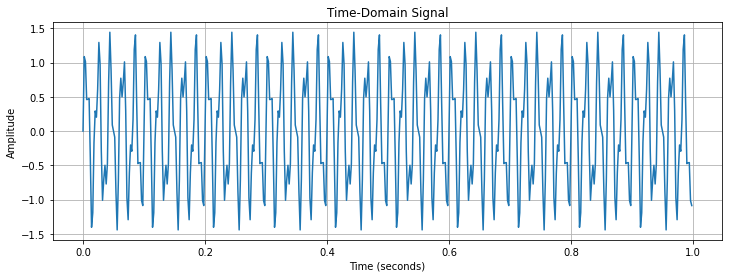

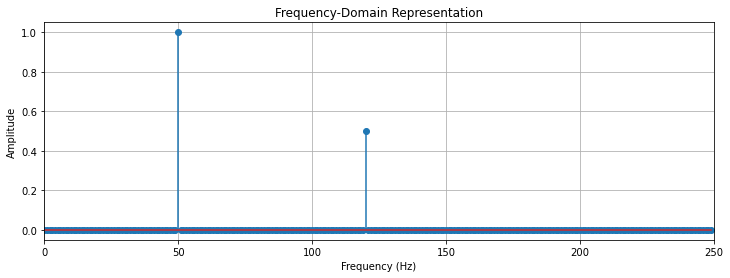

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Fs = 500      # Sampling frequency (samples per second)
T = 1         # Duration in seconds
t = np.linspace(0, T, Fs * T, endpoint=False)  # Time vector

# Generate a time-domain signal (sum of two sine waves)
f1 = 50  # Frequency of first sine wave (Hz)
f2 = 120  # Frequency of second sine wave (Hz)
amplitude1 = 1.0
amplitude2 = 0.5

# Time-domain signal
signal = amplitude1 * np.sin(2 * np.pi * f1 * t) + amplitude2 * np.sin(2 * np.pi * f2 * t)

# Plot the time-domain signal
plt.figure(figsize=(12, 4))
plt.plot(t, amplitude1 * np.sin(2 * np.pi * f1 * t))
plt.title('Time-Domain Signal (Sin 1) freq 50')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot the time-domain signal
plt.figure(figsize=(12, 4))
plt.plot(t, amplitude2 * np.sin(2 * np.pi * f2 * t))
plt.title('Time-Domain Signal (Sin 2) freq 120')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot the time-domain signal
plt.figure(figsize=(12, 4))
plt.plot(t, signal)
plt.title('Time-Domain Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Compute the FFT
N = len(signal)
signal_fft = np.fft.fft(signal)
freqs = np.fft.fftfreq(N, d=1/Fs)

# Only take the positive frequencies
idx = np.arange(N // 2)
freqs = freqs[idx]
signal_fft = signal_fft[idx]

# Compute the magnitude (absolute value) of the FFT
signal_magnitude = np.abs(signal_fft) * 2 / N  # Multiply by 2/N to normalize

# Plot the frequency-domain representation
plt.figure(figsize=(12, 4))
plt.stem(freqs, signal_magnitude, use_line_collection=True)
plt.title('Frequency-Domain Representation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, Fs / 2)  # Limit x-axis to Nyquist frequency
plt.grid(True)
plt.show()


### Example 6: Fourier Analysis for Noise Detection and Mitigation 

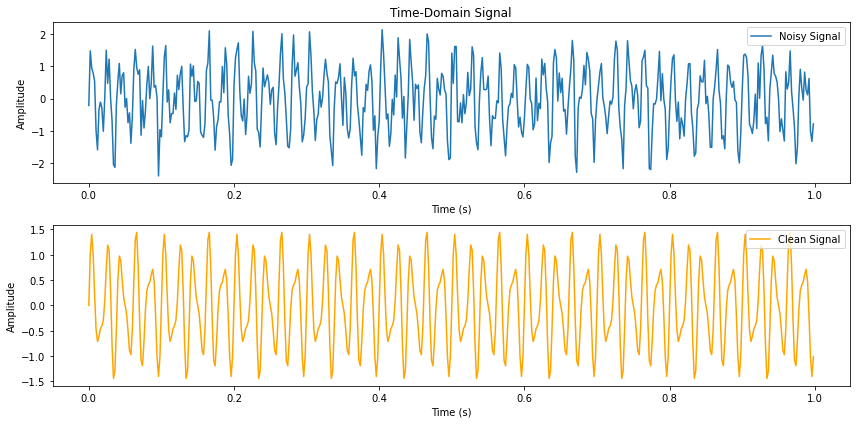

In [19]:
# Parameters
Fs = 500      # Sampling frequency (samples per second)
T = 1         # Duration in seconds
N = Fs * T    # Total number of samples
t = np.linspace(0, T, N, endpoint=False)  # Time vector

# Generate a clean signal (sum of two sine waves)
f1 = 50  # Frequency of first sine wave (Hz)
f2 = 80  # Frequency of second sine wave (Hz)
signal_clean = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Add high-frequency noise
noise = 0.5 * np.random.normal(0, 1, t.shape)
signal_noisy = signal_clean + noise

# Plot the time-domain signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal_noisy, label='Noisy Signal')
plt.title('Time-Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, signal_clean, label='Clean Signal', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()


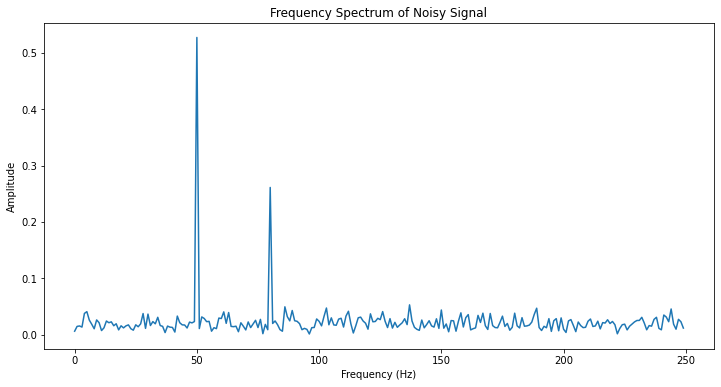

In [20]:
# Compute the Fast Fourier Transform (FFT)
signal_fft = np.fft.fft(signal_noisy)
freq = np.fft.fftfreq(N, d=1/Fs)

# Only need to plot the positive frequencies
idx = np.arange(N // 2)

# Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(freq[idx], np.abs(signal_fft[idx]) / N)
plt.title('Frequency Spectrum of Noisy Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


In [31]:
# Design a low-pass filter
cutoff_freq = 100  # Cutoff frequency in Hz
H = np.zeros(N)
H[np.abs(freq) < cutoff_freq] = 1

# Apply the filter in the frequency domain
signal_fft_filtered = signal_fft * H

# Transform back to the time domain
signal_filtered = np.fft.ifft(signal_fft_filtered)

# Ensure the result is real
signal_filtered = np.real(signal_filtered)


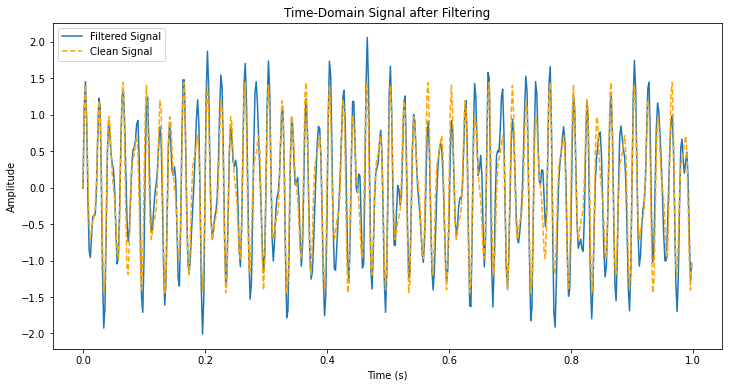

In [36]:
# Plot the filtered signal
plt.figure(figsize=(12, 6))
plt.plot(t, signal_filtered, label='Filtered Signal')
plt.plot(t, signal_clean, label='Clean Signal', linestyle='--', color='orange')
plt.title('Time-Domain Signal after Filtering')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


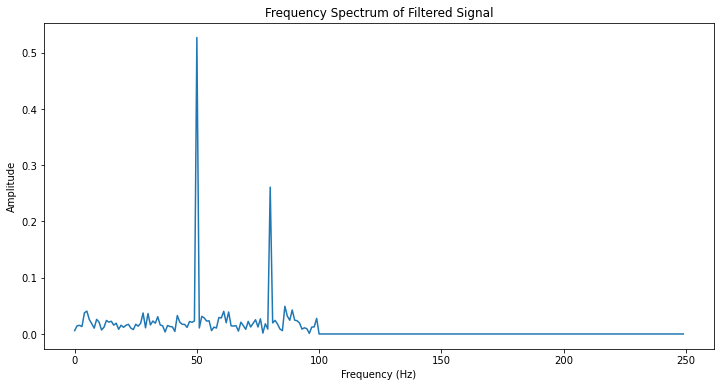

In [33]:
# Plot the frequency spectrum after filtering
plt.figure(figsize=(12, 6))
plt.plot(freq[idx], np.abs(signal_fft_filtered[idx]) / N)
plt.title('Frequency Spectrum of Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


###  Example 7: Box plot for outlier detection

In [61]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
plt.rcParams['hatch.linewidth'] = 1.4 
plt.rcParams['hatch.color'] = "white" 
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.serif"] = "Times New Roman"

Q1: 12.0, Q3: 13.0, IQR: 1.0
Lower bound :10.5, Upper bound :14.5
   Value Outlier
0     10     Yes
1     12      No
2     12      No
3     13      No
4     12      No
5     11      No
6     14      No
7     13      No
8     12      No
9     18     Yes


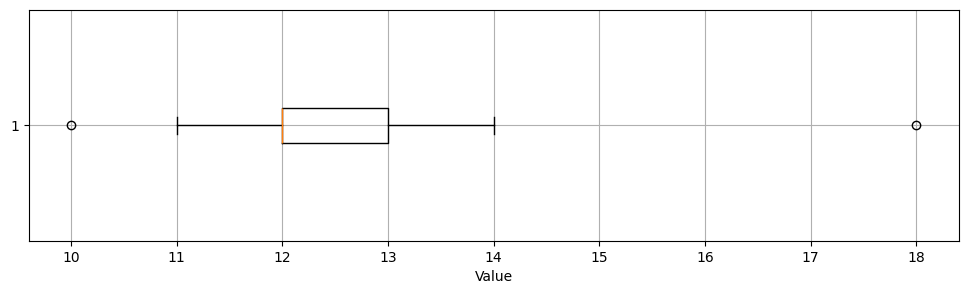

In [13]:
# Sample data
data = {'Value': [10, 12, 12, 13, 12, 11, 14, 13, 12, 18]}
df = pd.DataFrame(data)

# Calculate Q1, Q3, and IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
df['Outlier'] = df['Value'].apply(lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No')

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower bound :{lower_bound}, Upper bound :{upper_bound}")
print(df)
plt.figure(figsize=(12, 3))
plt.boxplot(df['Value'], vert=False,whis = 1.5)
#plt.title('Boxplot of Values')
plt.xlabel('Value')
plt.grid(True)
plt.show()

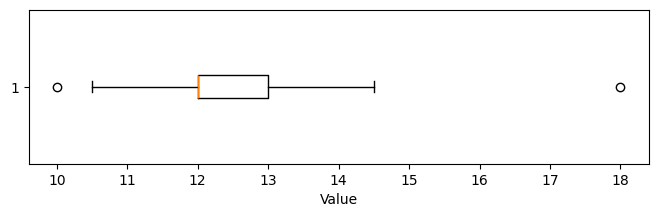

In [14]:
import numpy as np
import matplotlib.pyplot as plt

data = [10, 12, 12, 13, 12, 11, 14, 13, 12, 18]
x = np.sort(data)

n = len(x)
lower_half = x[:n//2]
upper_half = x[n//2:]
Q1 = np.median(lower_half)  # 12
Q3 = np.median(upper_half)  # 13
median = np.median(x)       # 12
IQR = Q3 - Q1               # 1

lb = Q1 - 1.5 * IQR         # 10.5
ub = Q3 + 1.5 * IQR         # 14.5

# Whiskers
whislo = lb
whishi = ub

# Outliers
fliers = [v for v in x if v < lb or v > ub]

# Build stats dict for bxp
stats = [{
    'whislo': whislo, 'q1': Q1,'med': median, 'q3': Q3,'whishi': whishi,'fliers': fliers
}]

# Plot using Axes.bxp
fig, ax = plt.subplots(figsize=(8, 2))
ax.bxp(stats, vert=False, showfliers=True)
ax.set_xlabel("Value")
plt.show()


### Example 8: Scatter plot for outlier detection

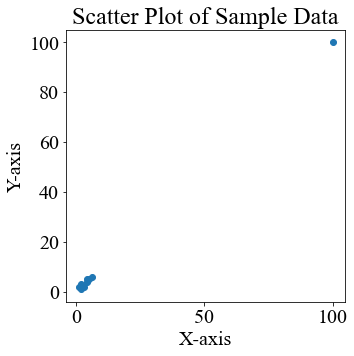

In [64]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 2, 3, 4, 4, 5, 6, 100]
y = [2, 1, 3, 2, 5, 4, 5, 6, 100]

# Create a scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.title('Scatter Plot of Sample Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()



### Example 8: Missing value pandas

In [2]:
# Sample DataFrame
data = {'Name': ['Alice', 'Bob', None, 'David'],
        'Age': [25, None, 27, 29],
        'Income': [50000, 60000, None, 80000]}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)


    Name   Age   Income
0  Alice  25.0  50000.0
1    Bob   NaN  60000.0
2   None  27.0      NaN
3  David  29.0  80000.0


In [3]:
print(df.isnull())

    Name    Age  Income
0  False  False   False
1  False   True   False
2   True  False    True
3  False  False   False


In [4]:
print(df.isnull().sum())

Name      1
Age       1
Income    1
dtype: int64


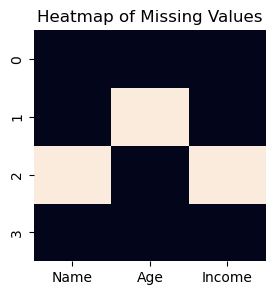

In [7]:
import seaborn as sns
plt.figure(figsize=(3, 3))
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()


### Example 9: Dealing with missing value

In [9]:
# Drop rows with any missing values
df_dropped = df.dropna()
print(df_dropped)


    Name   Age   Income
0  Alice  25.0  50000.0
3  David  29.0  80000.0


In [10]:
# Impute numerical columns with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Income'].fillna(df['Income'].mean(), inplace=True)

# Impute categorical columns with mode
df['Name'].fillna(df['Name'].mode()[0], inplace=True)

print(df)


    Name   Age        Income
0  Alice  25.0  50000.000000
1    Bob  27.0  60000.000000
2  Alice  27.0  63333.333333
3  David  29.0  80000.000000


In [12]:
# Forward fill
df_ffill = df.fillna(method='bfill')
print(df_ffill)


    Name   Age        Income
0  Alice  25.0  50000.000000
1    Bob  27.0  60000.000000
2  Alice  27.0  63333.333333
3  David  29.0  80000.000000


In [13]:
from sklearn.impute import KNNImputer
import numpy as np

# Sample DataFrame
data_knn = {'Age': [25, np.nan, 27, 29],
            'Income': [50000, 60000, np.nan, 80000]}
df_knn = pd.DataFrame(data_knn)

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df_knn), columns=df_knn.columns)

print(df_imputed)


    Age   Income
0  25.0  50000.0
1  27.0  60000.0
2  27.0  65000.0
3  29.0  80000.0


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Name': ['Alice', 'Bob', None, 'David', 'Emma'],
    'Age': [25, None, 27, 29, None],
    'Income': [50000, 60000, None, 80000, 55000],
    'Gender': ['F', 'M', 'F', None, 'F']
}
df = pd.DataFrame(data)

# Convert data types to numeric
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Impute missing 'Income' with mean (if needed)
df['Income'].fillna(df['Income'].mean(), inplace=True)

# Separate complete cases for 'Age' and 'Income'
complete_cases = df.dropna(subset=['Age', 'Income'])
incomplete_cases = df[df['Age'].isnull() & df['Income'].notnull()]

# Features and target
X_train = complete_cases[['Income']]
y_train = complete_cases['Age']

# Check if there are enough complete cases to train the model
if X_train.empty or y_train.empty:
    print("Not enough data to train the model.")
else:
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict missing 'Age' values
    X_missing = incomplete_cases[['Income']]
    df.loc[incomplete_cases.index, 'Age'] = model.predict(X_missing)

# Display the DataFrame
print(df)


/Users/hamid/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


    Name        Age   Income Gender
0  Alice  25.000000  50000.0      F
1    Bob  26.510204  60000.0      M
2   None  27.000000  61250.0      F
3  David  29.000000  80000.0   None
4   Emma  25.857143  55000.0      F


### Example 8 Duplicates

In [12]:
# Sample DataFrame
data = {
    'CustomerID': [1, 2, 3, 4, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'David'],
    'Email': ['alice@example.com', 'bob@example.com', 
              'charlie@example.com', 'david@example.com',
              'david@example.com']
}
df = pd.DataFrame(data)

# Identify duplicates
duplicates = df.duplicated()
print(df[duplicates])


   CustomerID   Name              Email
4           4  David  david@example.com


In [21]:
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'David'],
    'Email': ['alice@example.com', 'bob@example.com', 
              'charlie@example.com', 'david@example.com',
              'david@example.com']
}
df = pd.DataFrame(data)

# Identify exact duplicates (nothing since CustomerID is unique)
duplicates = df.duplicated()
print(df[duplicates])
print("=========================")
# Identify duplicates based on 'Email'
duplicates = df.duplicated(subset=['Email'])
print(df[duplicates])
print("=========================")
# Identify duplicates based on 'CustomerID' (no duplicate)
duplicates = df.duplicated(subset=['CustomerID'])
print(df[duplicates])


Empty DataFrame
Columns: [CustomerID, Name, Email]
Index: []
   CustomerID   Name              Email
4           5  David  david@example.com
Empty DataFrame
Columns: [CustomerID, Name, Email]
Index: []


In [28]:
from fuzzywuzzy import fuzz, process
# Sample data
names = ['Jon Doe', 'John Doe', 'Johnny Doe', 'Jane Smith']

# Define a function to find similar names
def find_similar(name, names_list):
    matches = process.extract(name, names_list, limit=3, scorer=fuzz.token_sort_ratio)
    return matches

# Find similar names to 'John Doe'
print(find_similar('John Doe', names))

[('John Doe', 100), ('Jon Doe', 93), ('Johnny Doe', 89)]


In [29]:
df_no_duplicates = df.drop_duplicates()

In [30]:
# Drop duplicates based on 'Email'
df_no_duplicates = df.drop_duplicates(subset=['Email'])

In [32]:
# Standardize 'Name' column
df['Name'] = df['Name'].str.lower().str.strip()


In [41]:
data = {
    'CustomerID': [1, 2, 3, 4],
    'Name': ['John Doe', 'John Doe', 'John Doe', 'Jane Smith'],
    'Email': ['jon.doe@example.com', 'john.doe@example.com', 'jdoe@example.com', 'jane.smith@example.com'],
    'Timestamp': ['2024-02-18 00:00:00', '2023-01-02 01:00:25', '2023-01-03 02:00:00','2020-03-01 02:00:00']
}
df = pd.DataFrame(data)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


# Sort by 'Timestamp' and drop duplicates
df_sorted = df.sort_values('Timestamp')
df_no_duplicates = df_sorted.drop_duplicates(subset='Name', keep='last')
df_no_duplicates


,CustomerID,Name,Email,Timestamp
3,4,Jane Smith,jane.smith@example.com,2020-03-01 02:00:00
0,1,John Doe,jon.doe@example.com,2024-02-18 00:00:00


### Handling Partial Duplicates with Fuzzy Matching

In [31]:
from fuzzywuzzy import process
import pandas as pd

# Sample DataFrame with similar names
data = {
    'CustomerID': [1, 2, 3, 4],
    'Name': ['Jon Doe', 'John Doe', 'Jon Do', 'Jane Smith'],
    'Email': ['jon.doe@example.com', 'john.doe@example.com', 'jdoe@example.com', 'jane.smith@example.com']
}

df = pd.DataFrame(data)

# Function to find duplicates based on 'Name'
def find_duplicate_names(df, threshold=90):
    names = df['Name'].tolist()
    duplicates = []
    for name in names:
        matches = process.extract(name, names, limit=None)
        for match in matches:
            if match[0] != name and match[1] >= threshold:
                duplicates.append((name, match[0], match[1]))
    return duplicates

# Find duplicates
duplicates = find_duplicate_names(df)
print("Potential Duplicate Names:")
for dup in duplicates:
    print(f"{dup[0]} <--> {dup[1]}, Similarity Score: {dup[2]}")

# Merge duplicates (this step would involve custom logic based on the findings)


Potential Duplicate Names:
Jon Doe <--> John Doe, Similarity Score: 93
Jon Doe <--> Jon Do, Similarity Score: 92
John Doe <--> Jon Doe, Similarity Score: 93
Jon Do <--> Jon Doe, Similarity Score: 92


### Creating a Master Record for Handling Duplicate (Complete Code)

In [42]:
import pandas as pd

# Sample data with duplicates
data = {
    'CustomerID': [1, 2, 2, 3, 4, 4],
    'Name': ['Alice', 'Bob', 'Robert', 'Charlie', 'David', 'Dave'],
    'Email': ['alice@example.com', 'bob@example.com', 'bobert@example.com', 'charlie@example.com', 'david@example.com', 'dave@example.com'],
    'Phone': ['555-1234', '555-5678', None, '555-8765', '555-0000', '555-0000'],
    'Address': ['123 Maple St', '456 Oak St', '456 Oak St Apt 2', '789 Pine St', None, '101 Elm St']
}

df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Find duplicate CustomerIDs
duplicate_ids = df[df.duplicated(subset='CustomerID', keep=False)]['CustomerID'].unique()
print("\nDuplicate CustomerIDs:", duplicate_ids)

# Define function to create master record
def create_master_record(group):
    master = {}
    master['CustomerID'] = group['CustomerID'].iloc[0]
    # For 'Name', choose the longest name (assuming it's more complete)
    master['Name'] = group['Name'].apply(lambda x: len(x)).idxmax()
    master['Name'] = group.loc[master['Name'], 'Name']
    # For 'Email', choose the most frequent one
    master['Email'] = group['Email'].mode()[0]
    # For 'Phone', combine unique non-null numbers
    master['Phone'] = ', '.join(group['Phone'].dropna().unique())
    # For 'Address', combine unique non-null addresses
    master['Address'] = ', '.join(group['Address'].dropna().unique())
    return pd.Series(master)

# Group duplicates and create master records
masters = df[df['CustomerID'].isin(duplicate_ids)].groupby('CustomerID').apply(create_master_record)

print("\nMaster Records:")
print(masters)

# Remove duplicates from the original DataFrame
df_no_duplicates = df[~df['CustomerID'].isin(duplicate_ids)]

print("\nDataFrame without Duplicates:")
print(df_no_duplicates)

# Reset index of masters
masters_reset = masters.reset_index(drop=True)

# Concatenate the master records with the non-duplicate records
df_cleaned = pd.concat([df_no_duplicates, masters_reset], ignore_index=True)

print("\nDataFrame after Merging Master Records:")
print(df_cleaned)


Original DataFrame:
   CustomerID     Name                Email     Phone           Address
0           1    Alice    alice@example.com  555-1234      123 Maple St
1           2      Bob      bob@example.com  555-5678        456 Oak St
2           2   Robert   bobert@example.com      None  456 Oak St Apt 2
3           3  Charlie  charlie@example.com  555-8765       789 Pine St
4           4    David    david@example.com  555-0000              None
5           4     Dave     dave@example.com  555-0000        101 Elm St

Duplicate CustomerIDs: [2 4]

Master Records:
            CustomerID    Name             Email     Phone  \
CustomerID                                                   
2                    2  Robert   bob@example.com  555-5678   
4                    4   David  dave@example.com  555-0000   

                                 Address  
CustomerID                                
2           456 Oak St, 456 Oak St Apt 2  
4                             101 Elm St  

DataFra